# Brain Tumor Classification

## Author : Saurabh 

In [3]:
pwd  

'E:\\DataScience\\MachineLearning\\Brain_Tumor_Data'

In [4]:
path='E:\\DataScience\\MachineLearning\\Brain_Tumor_Data'

In [5]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'archive.zip',
 'Brain-Tumor-Classification.ipynb',
 'data.csv']

In [6]:
#importing lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from wordcloud import WordCloud
from scipy import signal

#to supress warning
import warnings
warnings.filterwarnings('ignore')


# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')


In [7]:
df = pd.read_csv(path+"\\data.csv")

In [8]:
df.head(10)

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor
5,5,21,-13,5,11,-18,78,4,143,14,...,51,3,131,38,10,4,3,9,145,tumor
6,6,225,118,-5,175,-40,108,54,272,32,...,64,-3,142,55,202,-23,110,7,-14,tumor
7,7,-346,-35,37,42,39,18,14,28,34,...,84,-5,13,102,27,17,30,-5,-53,tumor
8,8,-378,31,-29,105,-54,19,-4,11,16,...,87,-4,110,25,18,15,97,0,-51,tumor
9,9,475,-79,20,41,10,65,-13,225,17,...,115,-4,95,47,41,-4,76,11,22,tumor


In [9]:
df.shape

(36, 7466)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [11]:
df.columns

Index(['Unnamed: 0', 'X53416', 'M83670', 'X90908', 'M97496', 'X90908.1',
       'U37019', 'R48602', 'T96548', 'X64559',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7466)

In [12]:
df.describe()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,17.500000,378.750000,177.305556,128.027778,568.305556,93.555556,366.833333,140.166667,644.194444,73.444444,...,31.750000,71.111111,35.694444,53.194444,38.388889,40.944444,41.222222,57.027778,58.694444,44.027778
std,10.535654,648.716067,243.494655,787.935802,637.451928,557.527370,427.166645,171.443202,685.514231,88.504219,...,50.036201,118.940748,127.437115,269.630628,47.619490,83.763935,251.147778,71.322001,336.030766,224.891782
min,0.000000,-694.000000,-117.000000,-50.000000,8.000000,-54.000000,-6.000000,-18.000000,-8.000000,-8.000000,...,-21.000000,-24.000000,-12.000000,-1484.000000,-73.000000,-16.000000,-23.000000,-5.000000,-17.000000,-214.000000
25%,8.750000,-95.750000,-31.000000,-13.250000,47.250000,-7.000000,27.250000,17.750000,33.250000,8.250000,...,1.500000,9.000000,-1.250000,59.250000,12.750000,3.500000,-4.750000,7.000000,-5.000000,-72.750000
50%,17.500000,194.500000,117.000000,-4.500000,293.500000,3.000000,110.500000,37.500000,333.500000,37.500000,...,10.000000,55.500000,3.000000,94.000000,36.000000,7.000000,0.000000,20.000000,1.500000,-12.000000
75%,26.250000,721.750000,330.500000,14.000000,1079.250000,10.250000,675.000000,268.500000,1185.250000,107.750000,...,48.000000,78.750000,6.000000,121.250000,64.000000,39.500000,6.500000,98.250000,7.000000,74.250000
max,35.000000,1815.000000,718.000000,4723.000000,2261.000000,3344.000000,1354.000000,718.000000,2203.000000,357.000000,...,156.000000,686.000000,686.000000,251.000000,138.000000,444.000000,1505.000000,271.000000,2018.000000,1089.000000


In [13]:
df['y'].value_counts()

Normal    18
tumor     18
Name: y, dtype: int64

In [14]:
df.tail(5)

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
31,31,488,564,-29,1303,-9,1236,265,2203,41,...,16,0,109,21,6,-15,11,7,-145,Normal
32,32,164,330,-13,721,12,504,154,1381,78,...,-18,1,-1484,-4,-1,-1,3,-5,-63,Normal
33,33,1282,116,-4,542,0,1070,344,1903,42,...,5,3,128,25,2,0,7,3,-69,Normal
34,34,68,718,-50,1816,-28,251,38,598,73,...,47,-2,190,3,0,8,21,22,-214,Normal
35,35,928,332,4,412,0,681,267,1132,357,...,9,1,67,19,10,1,32,-5,72,Normal


In [15]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [16]:
df.head()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,tumor
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,tumor
3,871,4,14,78,-6,85,65,227,19,22,...,77,6,78,30,87,-4,59,3,367,tumor
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,87,303,204,81,105,9,265,-2,126,tumor


## Binaries Target Column

In [17]:
target =pd.get_dummies(df['y'],dummy_na=True)

In [18]:
target

,Normal,tumor,NaN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [19]:
target = target.iloc[:,1]

In [20]:
target

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
Name: tumor, dtype: uint8

In [21]:
df = pd.concat([df,target],axis=1)

In [22]:
df.head()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y,tumor
0,70,-81,25,10,22,113,36,163,9,25,...,5,68,138,53,-4,123,2,19,tumor,1
1,108,-30,-7,60,0,24,8,113,-3,9,...,6,60,93,140,-3,271,-1,-51,tumor,1
2,75,-1,5,48,6,34,27,35,-1,4,...,225,94,62,39,-14,127,7,192,tumor,1
3,871,4,14,78,-6,85,65,227,19,22,...,6,78,30,87,-4,59,3,367,tumor,1
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,303,204,81,105,9,265,-2,126,tumor,1


In [23]:
df.drop('y',axis=1,inplace=True)

In [24]:
df.head(3)

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,tumor
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,1
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,1
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,1


## Feature_Engineering

In [25]:
#importing feauture_selection from sklearn
# stastistical fuction --- chi 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 ,f_classif

In [26]:
# X - independent variable , y - dependent varibale
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
X.shape

(36, 7464)

In [28]:
X.head()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
0,70,-81,25,10,22,113,36,163,9,25,...,44,75,5,68,138,53,-4,123,2,19
1,108,-30,-7,60,0,24,8,113,-3,9,...,110,186,6,60,93,140,-3,271,-1,-51
2,75,-1,5,48,6,34,27,35,-1,4,...,98,186,225,94,62,39,-14,127,7,192
3,871,4,14,78,-6,85,65,227,19,22,...,54,77,6,78,30,87,-4,59,3,367
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,142,87,303,204,81,105,9,265,-2,126


In [29]:
# k=50 : selecting top=50 rows values  which are highly co-related to taget 
# using f_classif function
fs_f =SelectKBest(f_classif ,k=50)
X_f_classif = fs_f.fit_transform(X,y)

In [30]:
#X_f_classif Selected
dfscores = pd.DataFrame(fs_f.scores_)
dfcolumns =pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(50,'Score')) 

         Specs      Score
7450    M77836  84.507552
1       M83670  81.238841
7       T96548  73.278478
67      U17077  72.741454
102     H06524  71.839985
35      J02854  69.898215
3       M97496  69.160545
106     T64297  66.327772
141     U14631  64.502637
110     M36634  64.430439
86      M12272  63.058184
137   Z49269.1  60.598889
7416    T51961  60.146450
7398    R61502  59.253926
7298    M26697  58.832810
71      X73502  58.037545
105     T67077  55.845284
14      H57136  55.372992
62      H43887  55.196710
7415    R88575  54.416065
117     T60155  54.099347
33      M95787  54.000241
167   Z49269.2  53.875574
7444    R08183  52.900725
7325    X12671  52.034783
7397    M22382  51.593770
5       U37019  51.455706
7360    R71676  51.057209
111     X12496  50.182784
2572    M80244  50.044666
85      T71025  49.420960
12      M95936  49.298914
7359    T52362  48.958963
7382    H40095  48.861731
7263    X70326  48.600413
39      M84526  48.554626
206     Z31695  48.452208
30      M633

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
 
#calling fit function 
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.         0.00098765 0.         ... 0.0044     0.         0.        ]


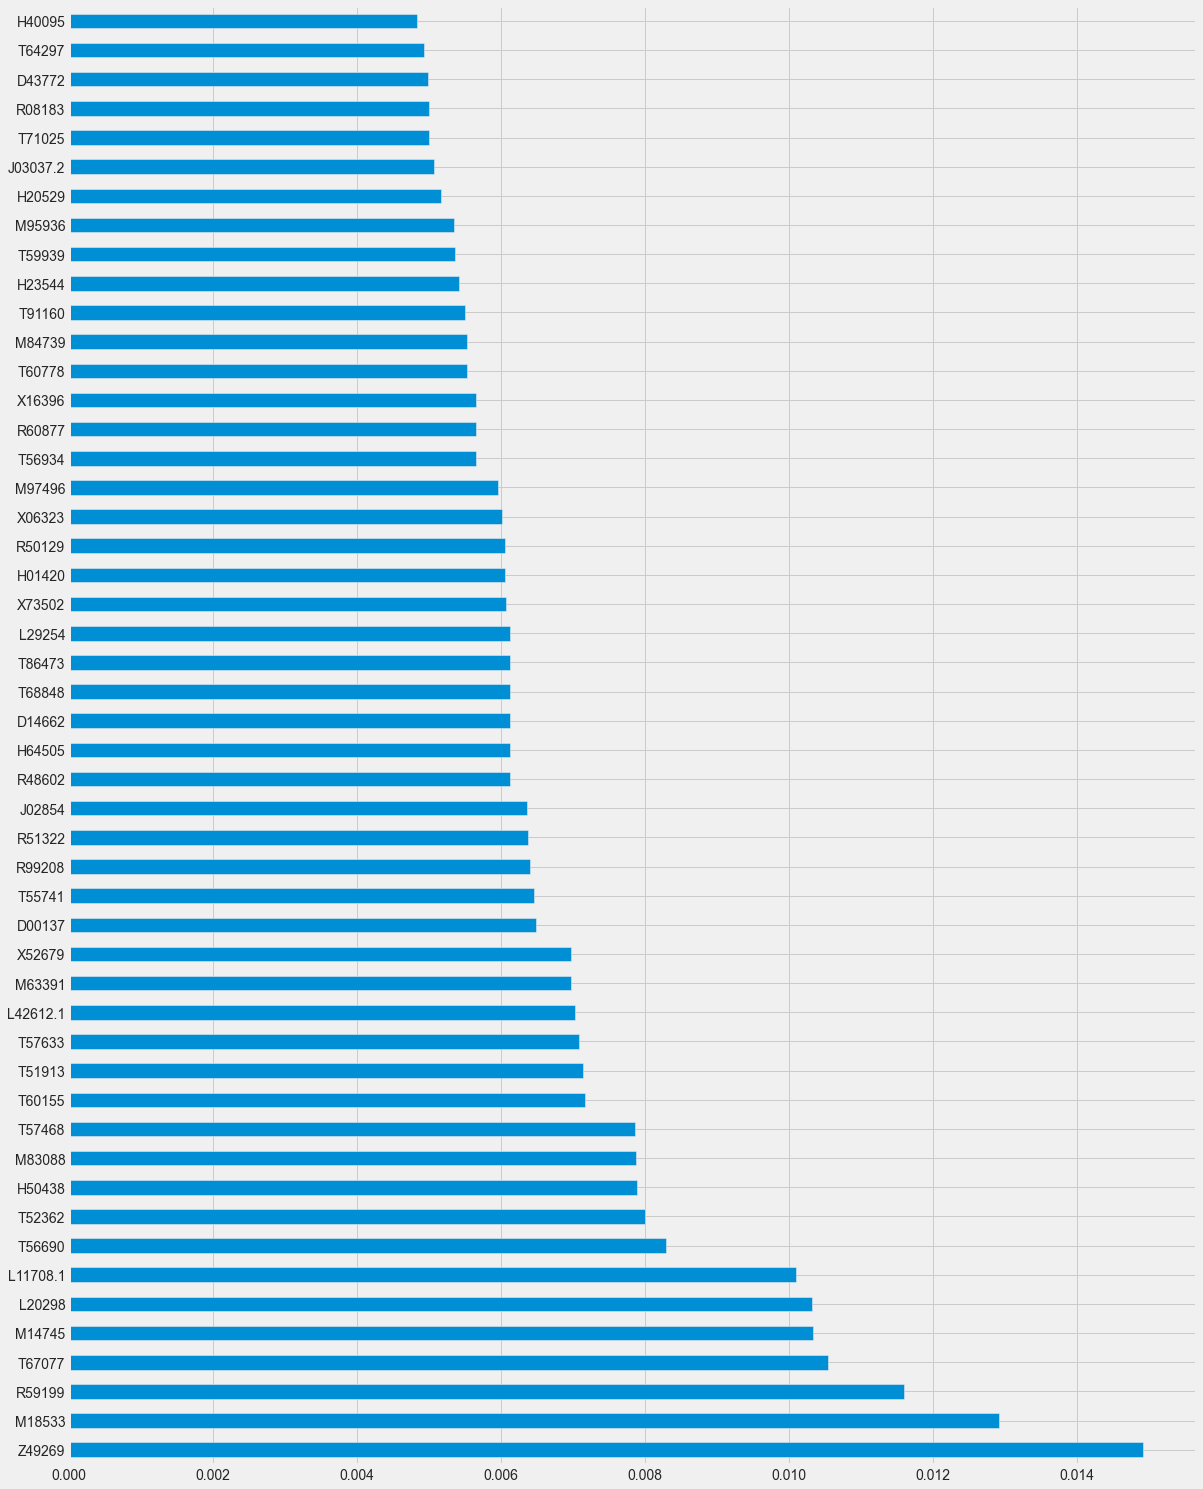

In [32]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(18,25))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [33]:
lst =df.columns
lst

Index(['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'tumor'],
      dtype='object', length=7465)

In [34]:
lst_f =featureScores.nlargest(50,'Score')
lst_f=lst_f['Specs']
lst_f = list(lst_f)
lst_f

['M77836',
 'M83670',
 'T96548',
 'U17077',
 'H06524',
 'J02854',
 'M97496',
 'T64297',
 'U14631',
 'M36634',
 'M12272',
 'Z49269.1',
 'T51961',
 'R61502',
 'M26697',
 'X73502',
 'T67077',
 'H57136',
 'H43887',
 'R88575',
 'T60155',
 'M95787',
 'Z49269.2',
 'R08183',
 'X12671',
 'M22382',
 'U37019',
 'R71676',
 'X12496',
 'M80244',
 'T71025',
 'M95936',
 'T52362',
 'H40095',
 'X70326',
 'M84526',
 'Z31695',
 'M63391',
 'Z49269',
 'T76971',
 'R99208',
 'M63603',
 'L03840',
 'M76378.1',
 'T51913',
 'M76378.2',
 'D63874',
 'H65842',
 'H09351',
 'R46753']

In [38]:
df_new = df[['M77836',
 'M83670','T96548','U17077','H06524','J02854','M97496',
 'T64297','U14631','M36634','M12272','Z49269.1','T51961','R61502','M26697','X73502','T67077',
 'H57136','H43887','R88575','T60155','M95787','Z49269.2','R08183','X12671','M22382','U37019','R71676','X12496','M80244',
 'T71025','M95936','T52362','H40095','X70326','M84526','Z31695','M63391','Z49269','T76971','R99208','M63603','L03840',
 'M76378.1','T51913','M76378.2','D63874','H65842','H09351','R46753','tumor']]

In [39]:
df_new

,M77836,M83670,T96548,U17077,H06524,J02854,M97496,T64297,U14631,M36634,...,M63603,L03840,M76378.1,T51913,M76378.2,D63874,H65842,H09351,R46753,tumor
0,108,-81,163,16,107,67,10,249,71,18,...,23,106,145,7,95,425,72,433,152,1
1,106,-30,113,40,115,70,60,131,111,18,...,16,100,118,7,92,441,42,128,186,1
2,123,-1,35,35,34,30,48,228,109,29,...,16,49,90,0,59,505,52,341,156,1
3,51,4,227,29,33,84,78,661,164,26,...,28,111,119,6,126,401,54,228,144,1
4,122,-34,-8,47,19,22,19,125,206,17,...,5,102,81,-4,89,342,35,171,149,1
5,54,-13,143,49,57,133,11,628,74,49,...,45,47,202,33,208,460,18,125,100,1
6,67,118,272,41,60,116,175,139,163,24,...,33,96,226,5,251,702,27,197,125,1
7,67,-35,28,13,78,67,42,128,40,16,...,16,71,112,27,107,527,29,67,121,1
8,74,31,11,50,55,83,105,541,95,12,...,19,40,121,9,130,413,20,164,73,1
9,63,-79,225,36,53,40,41,711,163,19,...,21,43,172,5,153,481,39,257,138,1


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [41]:
## independent and dependent varible
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [42]:
# train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [43]:
##
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression())])
pipe_SVM =Pipeline([('scaler2',StandardScaler()),
                    ('SVR',SVC())])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler4',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])

In [44]:
pipeline1=[pipe_LR,pipe_SVM,pipe_DT,pipe_RF,pipe_Knn]

In [45]:
pipe_dict={0:'Logistic_Regression',1:'SVC',2:'Decesion_Tree_Classifier',3:'Random_Tree_classifier',4:'KNN_classifier'}

In [46]:
for pipe in pipeline1:
  pipe.fit(X_train,y_train)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
for i,model in enumerate(pipeline1):
  print("{}_Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic_Regression_Accuracy: 1.0
SVC_Accuracy: 1.0
Decesion_Tree_Classifier_Accuracy: 1.0
Random_Tree_classifier_Accuracy: 1.0
KNN_classifier_Accuracy: 1.0


In [ ]:
------------xxxxxxxxxxxxx---------------xxxxxxxxxxx--------------